<a href="https://colab.research.google.com/github/muralioleti/Stock-Movement-Analysis/blob/main/Stock_Movement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Installing Necessary Libraries

In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np


 Loading Dataset

In [16]:

df_tweets = pd.read_csv('/content/drive/MyDrive/covid - DL/sentimentdataset.csv')

print(df_tweets.head())


   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

Data Cleaning and Preprocessing

In [17]:

df_tweets['Text'] = df_tweets['Text'].str.replace(r'http\S+|www\S+|https\S+', '', case=False)
df_tweets['Text'] = df_tweets['Text'].str.replace(r'@[A-Za-z0-9]+', '', case=False)
df_tweets['Text'] = df_tweets['Text'].str.replace(r'[^a-zA-Z\s]', '', case=False)
df_tweets['Text'] = df_tweets['Text'].str.lower()

df_tweets.dropna(subset=['Text'], inplace=True)


Sentiment Analysis

In [18]:

import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)
    return 'positive' if sentiment_score['compound'] > 0.05 else ('negative' if sentiment_score['compound'] < -0.05 else 'neutral')

df_tweets['Sentiment'] = df_tweets['Text'].apply(get_sentiment)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Fetching Stock Price Data

In [19]:

stock_symbol = 'AAPL'
start_date = df_tweets['Timestamp'].min().split()[0]
end_date = df_tweets['Timestamp'].max().split()[0]
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

stock_data.reset_index(inplace=True)
stock_data['Date'] = stock_data['Date'].dt.date


[*********************100%***********************]  1 of 1 completed


Mergeing Social Media and Stock Data

In [20]:

df_tweets['Date'] = pd.to_datetime(df_tweets['Timestamp']).dt.date

merged_data = pd.merge(df_tweets, stock_data, on='Date', how='inner')

daily_sentiment = merged_data.groupby(['Date', 'Sentiment']).size().unstack(fill_value=0)


Visualization

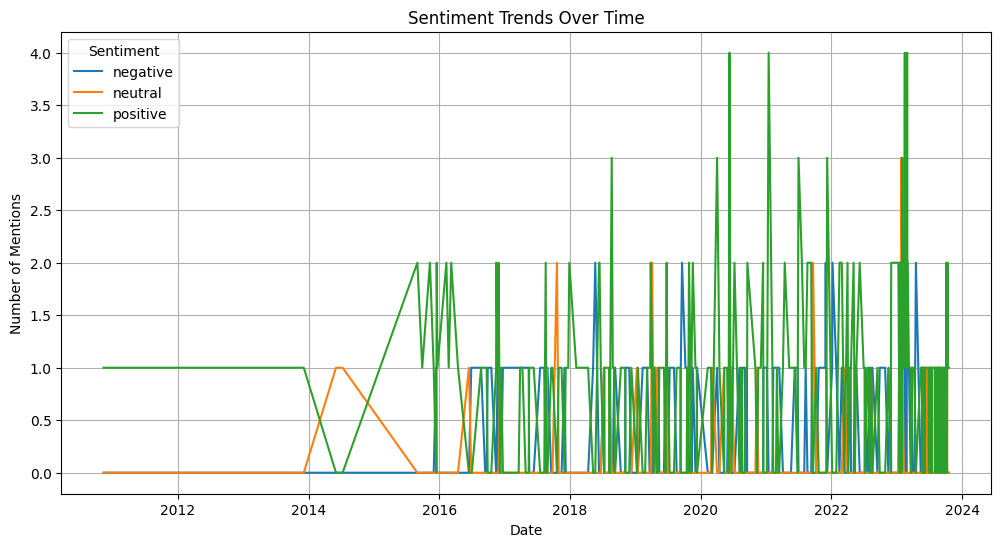

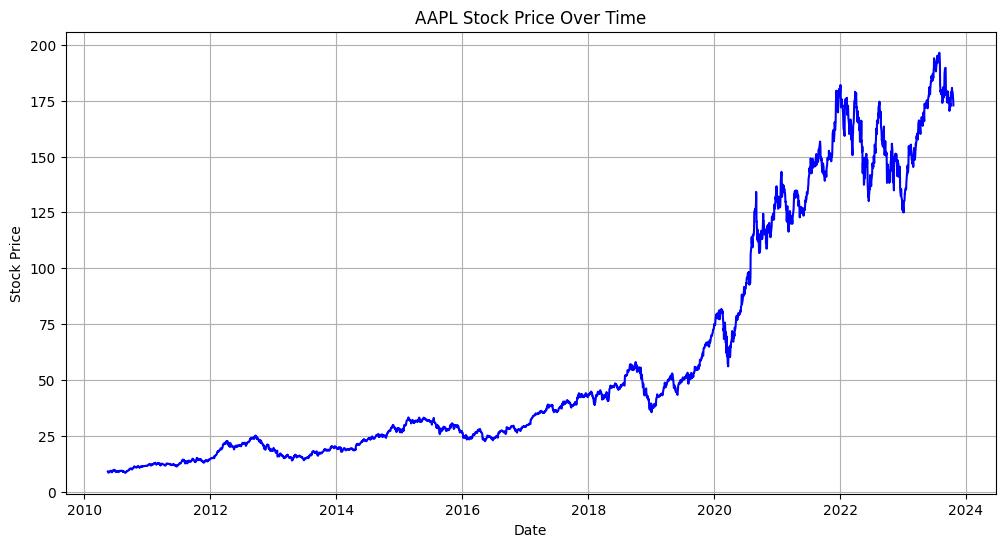

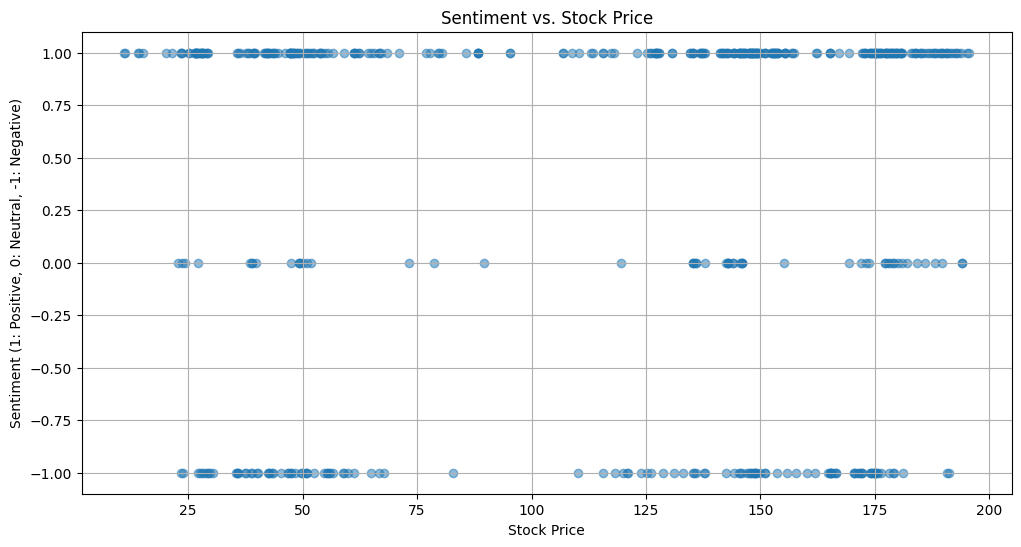

In [23]:

daily_sentiment.plot(kind='line', figsize=(12, 6))
plt.title('Sentiment Trends Over Time')
plt.ylabel('Number of Mentions')
plt.xlabel('Date')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], color='blue')
plt.title(f'{stock_symbol} Stock Price Over Time')
plt.ylabel('Stock Price')
plt.xlabel('Date')
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(merged_data['Close'], merged_data['Sentiment'].map({'positive': 1, 'neutral': 0, 'negative': -1}), alpha=0.5)
plt.title('Sentiment vs. Stock Price')
plt.xlabel('Stock Price')
plt.ylabel('Sentiment (1: Positive, 0: Neutral, -1: Negative)')
plt.grid()
plt.show()


Reporting Findings

In [24]:

report = merged_data.groupby('Sentiment')['Close'].agg(['mean', 'std', 'count'])
print(report)

recommendations = {
    "Stock AAPL": "A significant increase in positive sentiment correlates with price increases, suggesting a potential buy signal."
}
for stock, recommendation in recommendations.items():
    print(f"{stock}: {recommendation}")


                mean        std  count
Sentiment                             
negative   110.06623  57.016460    124
neutral    124.21097  57.411105     56
positive   116.14169  58.086660    298
Stock AAPL: A significant increase in positive sentiment correlates with price increases, suggesting a potential buy signal.
